## Random Forest (Bosques Aleatorios)

In [1]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.metrics import classification_report
import matplotlib.pyplot as plt  
import seaborn as sns

from sklearn.metrics import cohen_kappa_score

from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold

In [2]:
def indices_general (MC,nombres=None):
    precision_global=np.sum(MC.diagonal())/np.sum(MC)
    error_global=1-precision_global
    
    precision_categoria=pd.DataFrame(MC.diagonal()/np.sum(MC,axis=1)).T
    if nombres!=None:
        precision_categoria.columns=nombres
    return {"Matriz de Confusión":MC,
           "Precision Global":precision_global,
           "Error Global":error_global,
           "Precisión por categoría":precision_categoria}

In [3]:
datos= pd.read_csv('data/AprendizajeCredito.csv',delimiter=',',decimal='.')

In [4]:
datos.shape

(2500, 7)

In [5]:
datos.head(2)

,id,MontoCredito,IngresoNeto,CoefCreditoAvaluo,MontoCuota,GradoAcademico,BuenPagador
0,1,1,1,1,1,1,Si
1,2,3,1,1,1,1,Si


In [6]:
datos=datos.iloc[0:,1:]
datos.head(3)

,MontoCredito,IngresoNeto,CoefCreditoAvaluo,MontoCuota,GradoAcademico,BuenPagador
0,1,1,1,1,1,Si
1,3,1,1,1,1,Si
2,2,1,1,1,1,Si


In [7]:
datos["MontoCredito"]=datos["MontoCredito"].astype("category")
datos["IngresoNeto"]=datos["IngresoNeto"].astype("category")
datos["CoefCreditoAvaluo"]=datos["CoefCreditoAvaluo"].astype("category")
datos["MontoCuota"]=datos["MontoCuota"].astype("category")
datos["GradoAcademico"]=datos["GradoAcademico"].astype("category")

In [8]:
X=datos.iloc[:,0:5]
X.head(4)

,MontoCredito,IngresoNeto,CoefCreditoAvaluo,MontoCuota,GradoAcademico
0,1,1,1,1,1
1,3,1,1,1,1
2,2,1,1,1,1
3,1,2,1,1,1


In [9]:
y=datos.iloc[:,5:6]
y.head(4)

,BuenPagador
0,Si
1,Si
2,Si
3,Si


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.30,random_state=80)

![Image](images/random_forest.png)

In [11]:
from sklearn.ensemble import RandomForestClassifier

**Mediante el constructor inicializa la instancia bosque**
- n_estimators: Número de árboles que va usar

In [12]:
modelo=RandomForestClassifier(n_estimators=10,random_state=0)

In [13]:
modelo.fit(X_train,np.ravel(np.array(y_train)))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [14]:
y_pred=modelo.predict(X_test)

In [15]:
pd.DataFrame(y_pred).head(2)

,0
0,Si
1,Si


In [16]:
indices=indices_general(metrics.confusion_matrix(y_test,y_pred))
for k in indices:
    print("\n%s:\n%s"%(k,str(indices[k])))


Matriz de Confusión:
[[ 71  34]
 [  9 636]]

Precision Global:
0.9426666666666667

Error Global:
0.05733333333333335

Precisión por categoría:
         0         1
0  0.67619  0.986047


In [17]:
#
print(accuracy_score(y_test, y_pred))
#
print(recall_score(y_test, y_pred, average='macro'))
#
print(precision_score(y_test, y_pred, average='macro'))
#
print(f1_score(y_test, y_pred, average='macro'))
#
print(classification_report(y_test, y_pred))

0.9426666666666667
0.8311184939091916
0.9183768656716418
0.8674339738978523
              precision    recall  f1-score   support

          No       0.89      0.68      0.77       105
          Si       0.95      0.99      0.97       645

    accuracy                           0.94       750
   macro avg       0.92      0.83      0.87       750
weighted avg       0.94      0.94      0.94       750



In [18]:
cohen_kappa_score(y_test,y_pred)

0.7355473554735548

**Curva ROC**

In [19]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
y_test1 = lb_make.fit_transform(np.ravel(np.array(y_test)))

from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
y1 = lb_make.fit_transform(np.ravel(np.array(y)))

In [20]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [21]:
y_predict_probabilities = modelo.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test1, y_predict_probabilities)
roc_auc = auc(fpr, tpr)

**Área bajo la curva ROC**

In [22]:
roc_auc

0.9153857511997047

**Curva ROC**

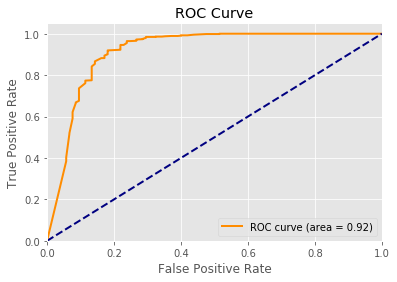

In [23]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

**Importancia de Atributos Para Seleccionar Atributos**

In [24]:
importancia=modelo.feature_importances_
importancia

array([0.14937088, 0.04673061, 0.34835842, 0.15743683, 0.29810326])

In [25]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.close(fig=None)>

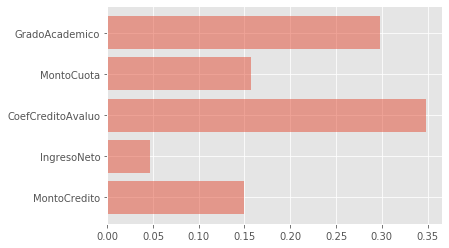

In [26]:
etiquetas=X_train.columns.values
y_pos=np.arange(len(etiquetas))
plt.barh(y_pos,importancia,align="center",alpha=0.5)
plt.yticks(y_pos,etiquetas)
plt.close

## GradientBoostingClassifier

In [27]:
from sklearn.ensemble import GradientBoostingClassifier

# Por defecto n_estimators=100
modelo_g = GradientBoostingClassifier(random_state = 0)
modelo_g.fit(X_train,np.ravel(np.array(y_train)))

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)